In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Исследование датасета

In [2]:
df = pd.read_csv('segmentation data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
# Просмотр уникальных значений колонок

for col in df.columns:
    if df[col].nunique() < 10:
        print(f'\nКолонка {col} --- Кол-во уникальных значений {df[col].nunique()} --- Уникальные значения {df[col].unique()}')
    else:
        print(f'\nКолонка {col} --- Кол-во уникальных значений {df[col].nunique()}')


Колонка ID --- Кол-во уникальных значений 2000

Колонка Sex --- Кол-во уникальных значений 2 --- Уникальные значения [0 1]

Колонка Marital status --- Кол-во уникальных значений 2 --- Уникальные значения [0 1]

Колонка Age --- Кол-во уникальных значений 58

Колонка Education --- Кол-во уникальных значений 4 --- Уникальные значения [2 1 0 3]

Колонка Income --- Кол-во уникальных значений 1982

Колонка Occupation --- Кол-во уникальных значений 3 --- Уникальные значения [1 0 2]

Колонка Settlement size --- Кол-во уникальных значений 3 --- Уникальные значения [2 0 1]


Колонка ID уникальна, поэтому для построения моделей от неё лучше избавится

In [8]:
df.drop(['ID'], axis = 1, inplace = True)

# Распределения данных

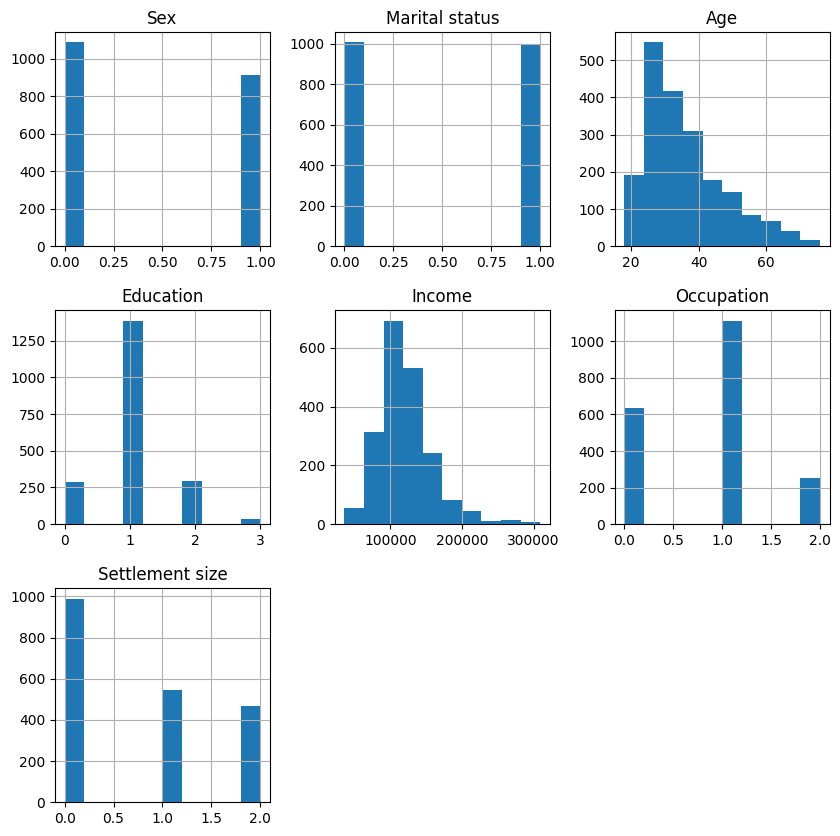

In [9]:
df.hist(figsize = (10, 10));

# Поиск линейных зависимостей

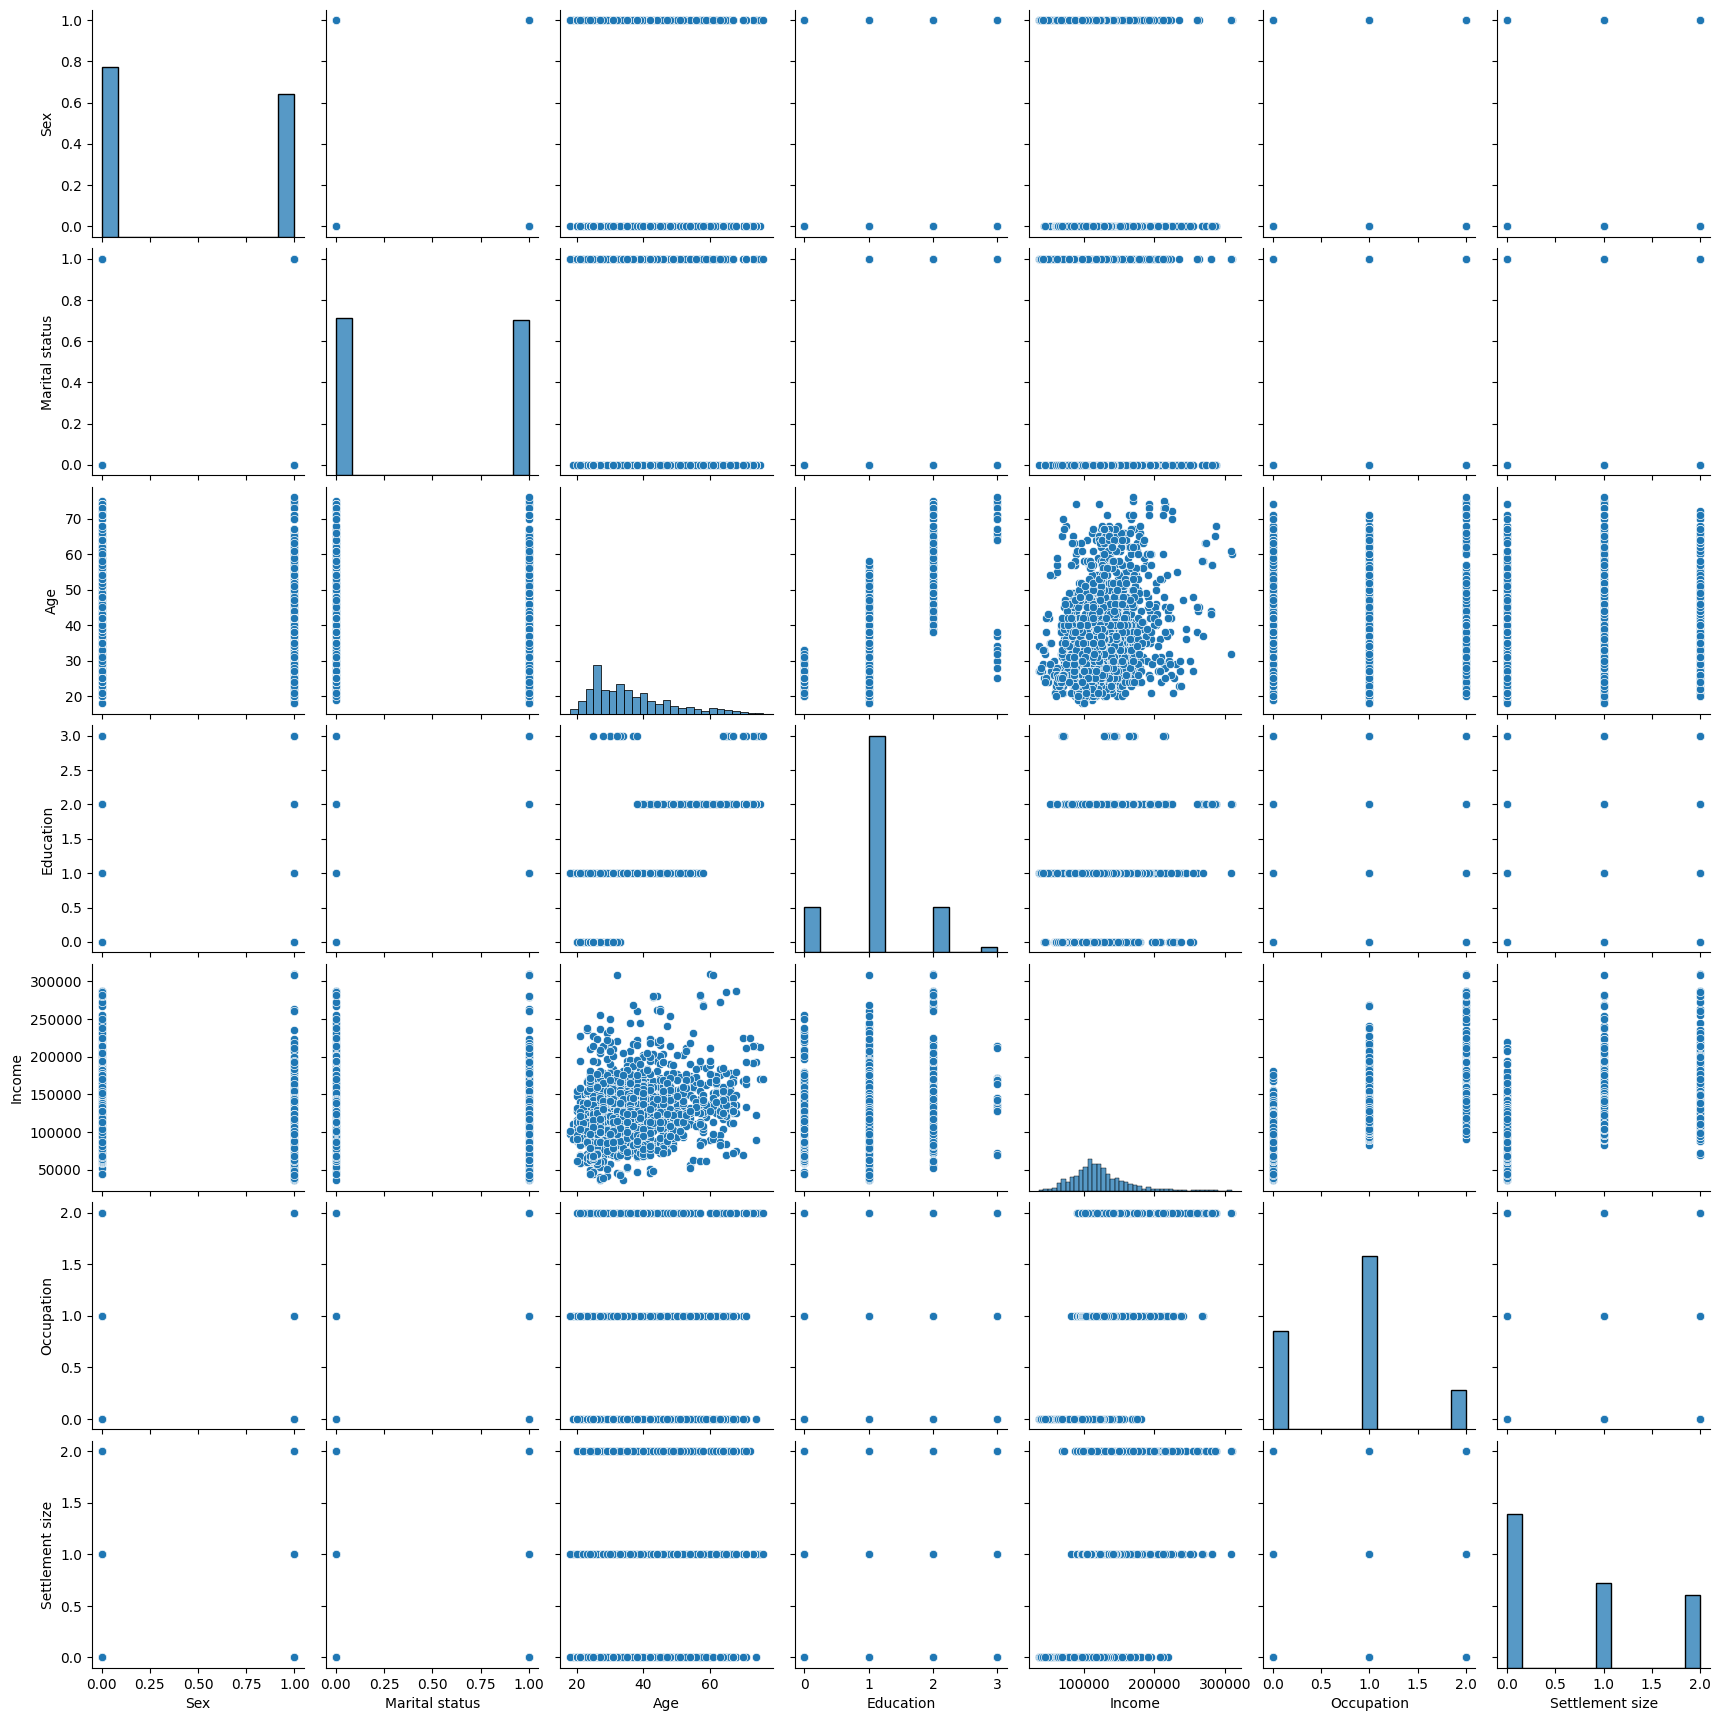

In [10]:
sns.pairplot(df);

# Выбросы данных

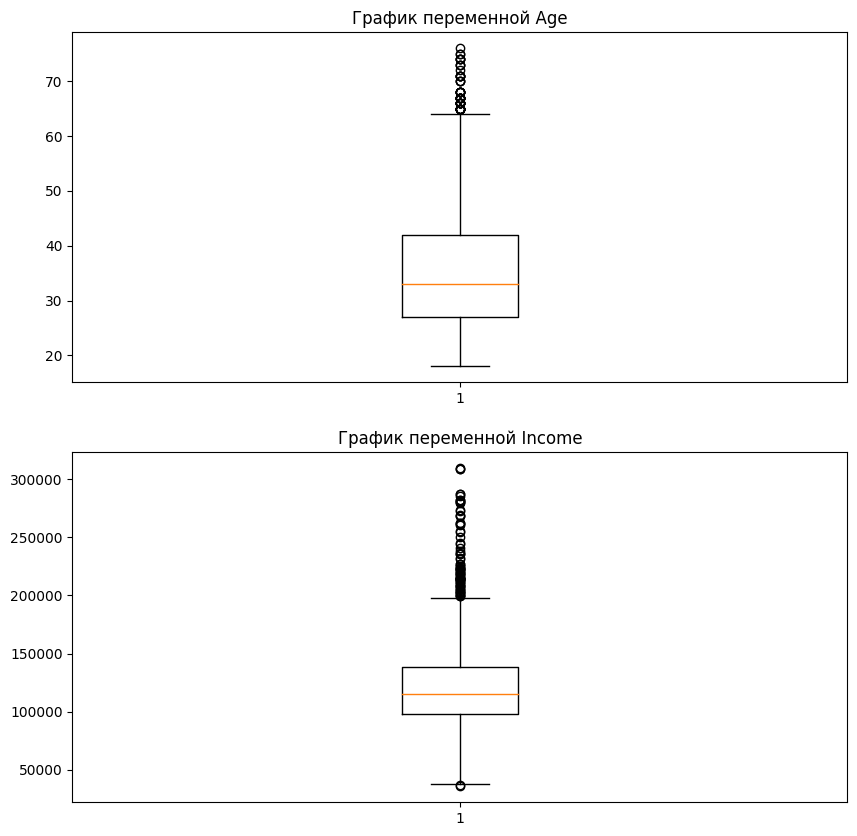

In [11]:
num_cols = [col for col in df.columns if df[col].nunique() > 10]

fig, axs = plt.subplots(ncols = 1, nrows = len(num_cols), figsize = (10, 10))

for i in range(len(num_cols)):
    axs[i].boxplot(df[num_cols[i]])
    axs[i].set_title(f'График переменной {num_cols[i]}')
    
plt.show()

# Корреляции данных

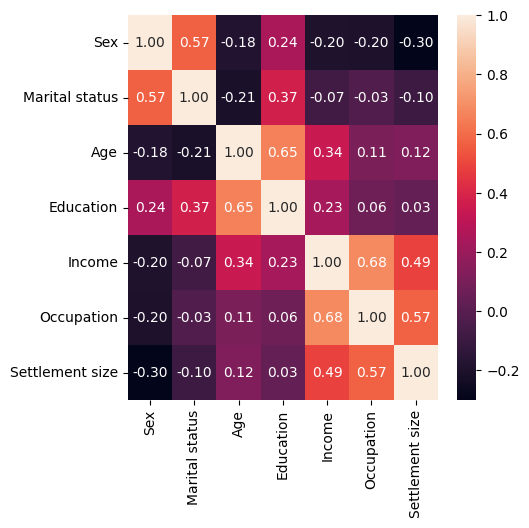

In [12]:
plt.figure(figsize = (5, 5))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')

plt.show()

# Шкалирование данных

In [19]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = [col for col in df.columns if df[col].nunique() > 2]

scaler = MinMaxScaler()

df_scaled = df.copy()

df_scaled[scale_cols] = scaler.fit_transform(df[scale_cols])



df_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,0.666667,0.324781,0.5,1.0
1,1,1,0.068966,0.333333,0.420210,0.5,1.0
2,0,0,0.534483,0.333333,0.195144,0.0,0.0
3,0,0,0.465517,0.333333,0.496223,0.5,0.5
4,0,0,0.603448,0.333333,0.413842,0.5,0.5


# Кластеризация hierarhical

In [62]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(df_scaled)

Z = hierarchy.linkage(distance_mat, 'ward')

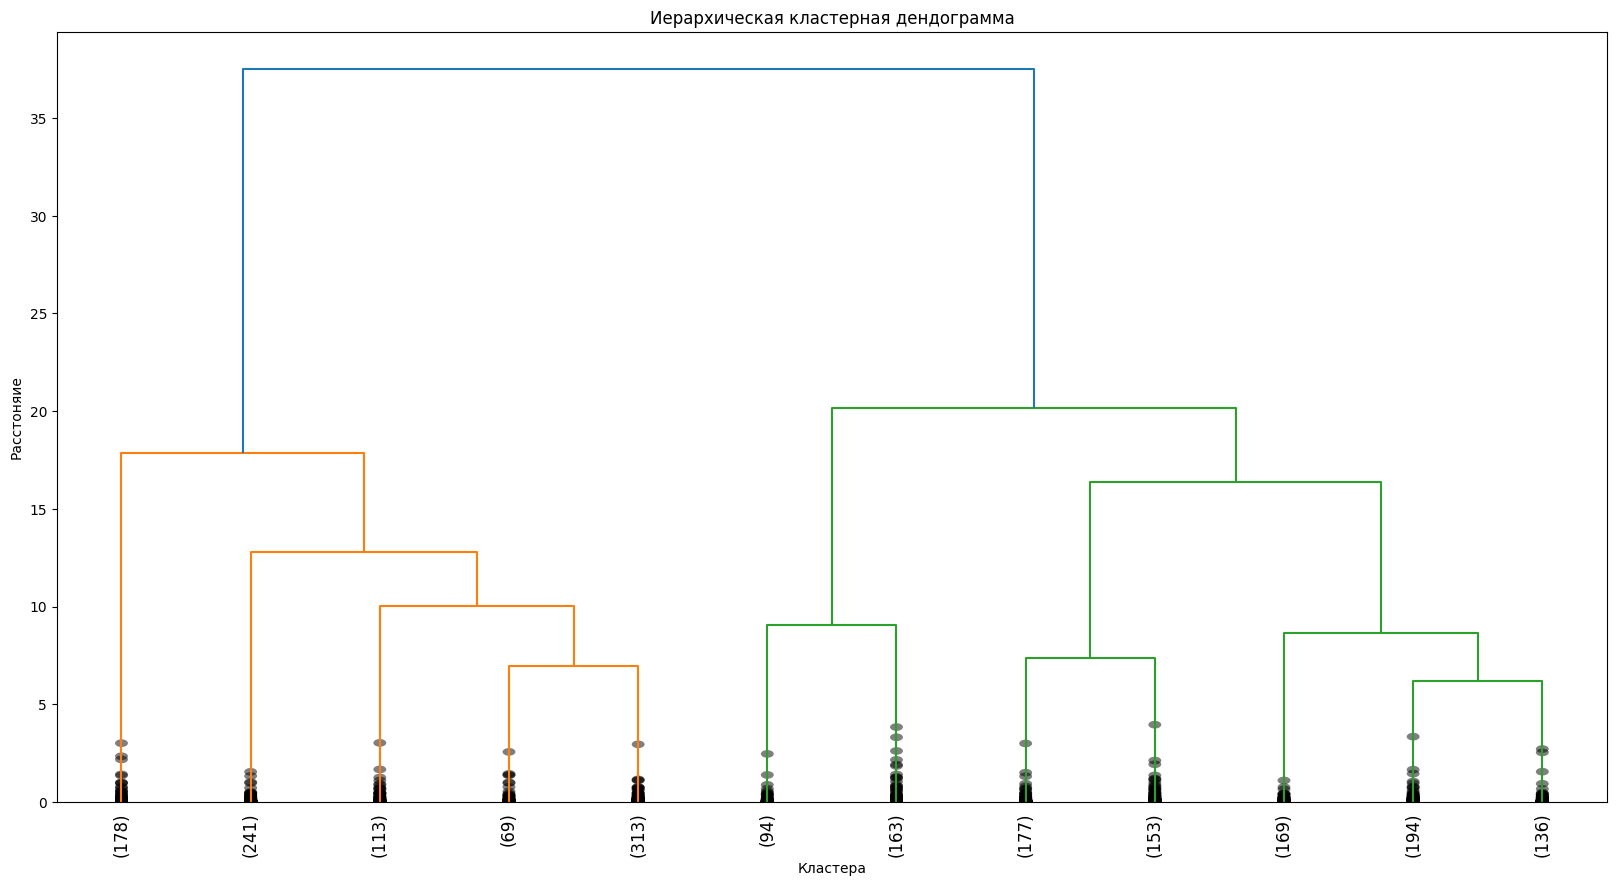

In [67]:
plt.figure(figsize = (20, 10))

plt.title('Иерархическая кластерная дендограмма')
plt.xlabel('Кластера')
plt.ylabel('Расстоняие')

hierarchy.dendrogram(Z,
                   truncate_mode = 'lastp',
                   p = 12,
                   leaf_rotation = 90,
                   leaf_font_size = 12,
                   show_contracted = True,
                    )

plt.show()

# Кластеризация k_means

Text(0.5, 1.0, 'Поиск оптимальной k при помощи метода локтя')

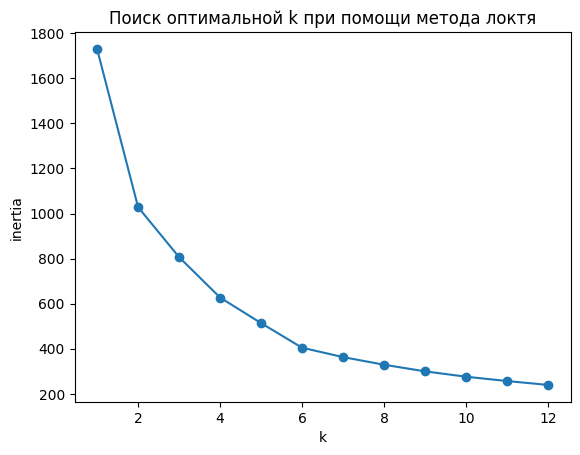

In [25]:
# Поиск оптимального кол-ва кластеров при помощи метода локтя

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
k = range(1, 13)

for k_i in k:
    km = KMeans(n_clusters = k_i).fit(df_scaled)
    inertia.append(km.inertia_)
    
plt.plot(k, inertia, '-o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Поиск оптимальной k при помощи метода локтя')

[0.3908135700315586, 0.3569135304337949, 0.4023684317095256, 0.4224716320686519, 0.4373042442245209, 0.44384573945548805, 0.4142753965939429, 0.4095372315901478, 0.42388978592170024, 0.4324653650198295, 0.43979352021740187, 0.45291396398012135]


Text(0.5, 1.0, 'Поиск оптимальной k при помощи silhouette_score')

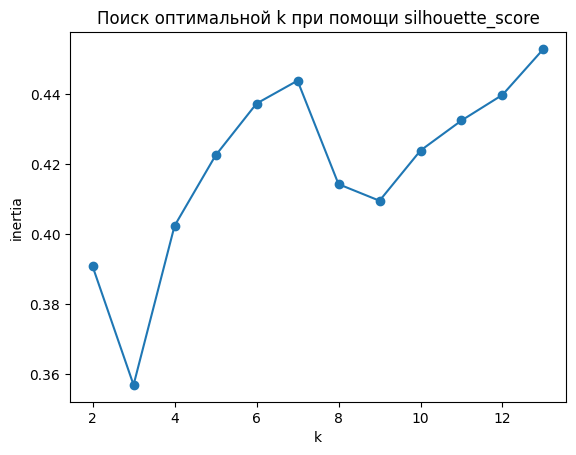

In [27]:
# Поиск оптимального кол-ва кластеров при помощи silhouette_score

inertia = []
k = range(2, 14)

for k_i in k:
    km = KMeans(n_clusters = k_i).fit(df_scaled)
    inertia.append(silhouette_score(df_scaled, km.labels_))
    
print(inertia)

plt.plot(k, inertia, '-o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Поиск оптимальной k при помощи silhouette_score')

Согласно графикам оптимальное кол-во кластеров для k_means = 2

In [28]:
# Обучаем алгоритм k_means

km = KMeans(n_clusters = 2).fit(df_scaled)

### Эмпирический подбор perplexity для TSNE

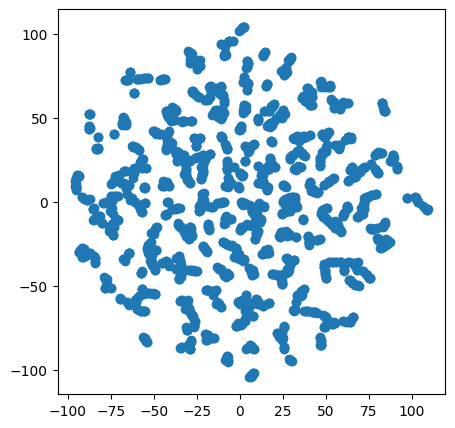

In [37]:
# Первый вариант

from sklearn.manifold import TSNE

tsne = TSNE(perplexity = 5)

tsne_transformed = tsne.fit_transform(df_scaled)

plt.figure(figsize = (5, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

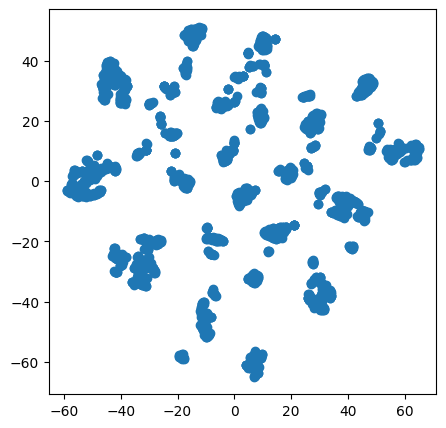

In [30]:
# Второй вариант

tsne = TSNE(perplexity = 25)

tsne_transformed = tsne.fit_transform(df_scaled)

plt.figure(figsize = (5, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

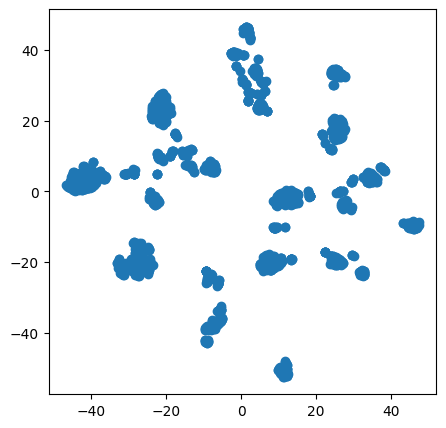

In [31]:
# Третий вариант

tsne = TSNE(perplexity = 50)

tsne_transformed = tsne.fit_transform(df_scaled)

plt.figure(figsize = (5, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

Эмпирически установлено, что для визуализации 2-х кластеорв наиболее подходит гиперпараметр perplexity = 5

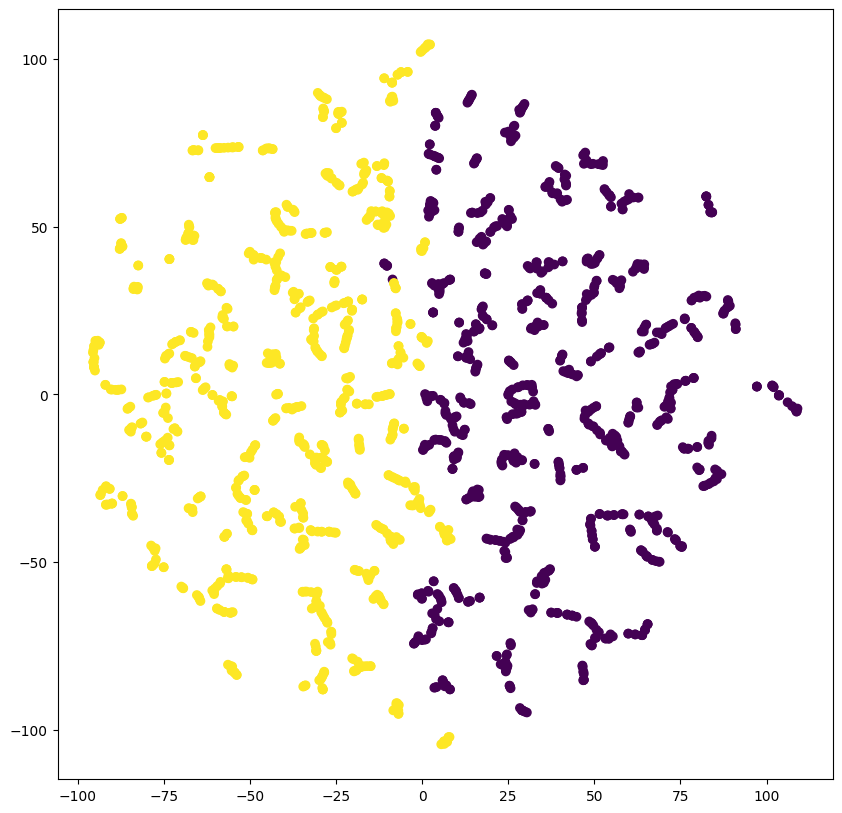

In [42]:
# Визуализация результата k_means

tsne = TSNE(perplexity = 5)

tsne_transformed = tsne.fit_transform(df_scaled)

plt.figure(figsize = (10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c = km.labels_)
plt.show()


### Алгоритм k_means Вариант 2. 7 кластеров и perplexity = 50 

In [43]:
# Обучаем алгоритм k_means

km = KMeans(n_clusters = 7).fit(df_scaled)

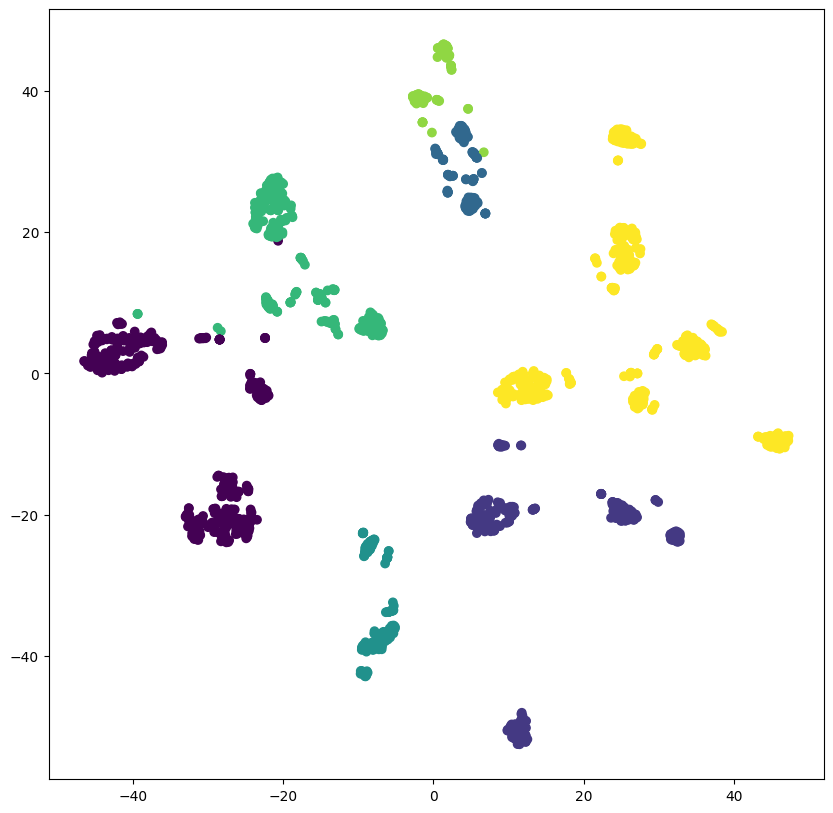

In [47]:
# Визуализация результата k_means

tsne = TSNE(perplexity = 50)

tsne_transformed = tsne.fit_transform(df_scaled)

plt.figure(figsize = (10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c = km.labels_)
plt.show()

Наиболее предпочтительным будет выбор 7 кластеров для алгоритма k_means 

### Интерпритация результатов кластеризации k_means 

In [48]:
df_scaled.shape

(2000, 7)

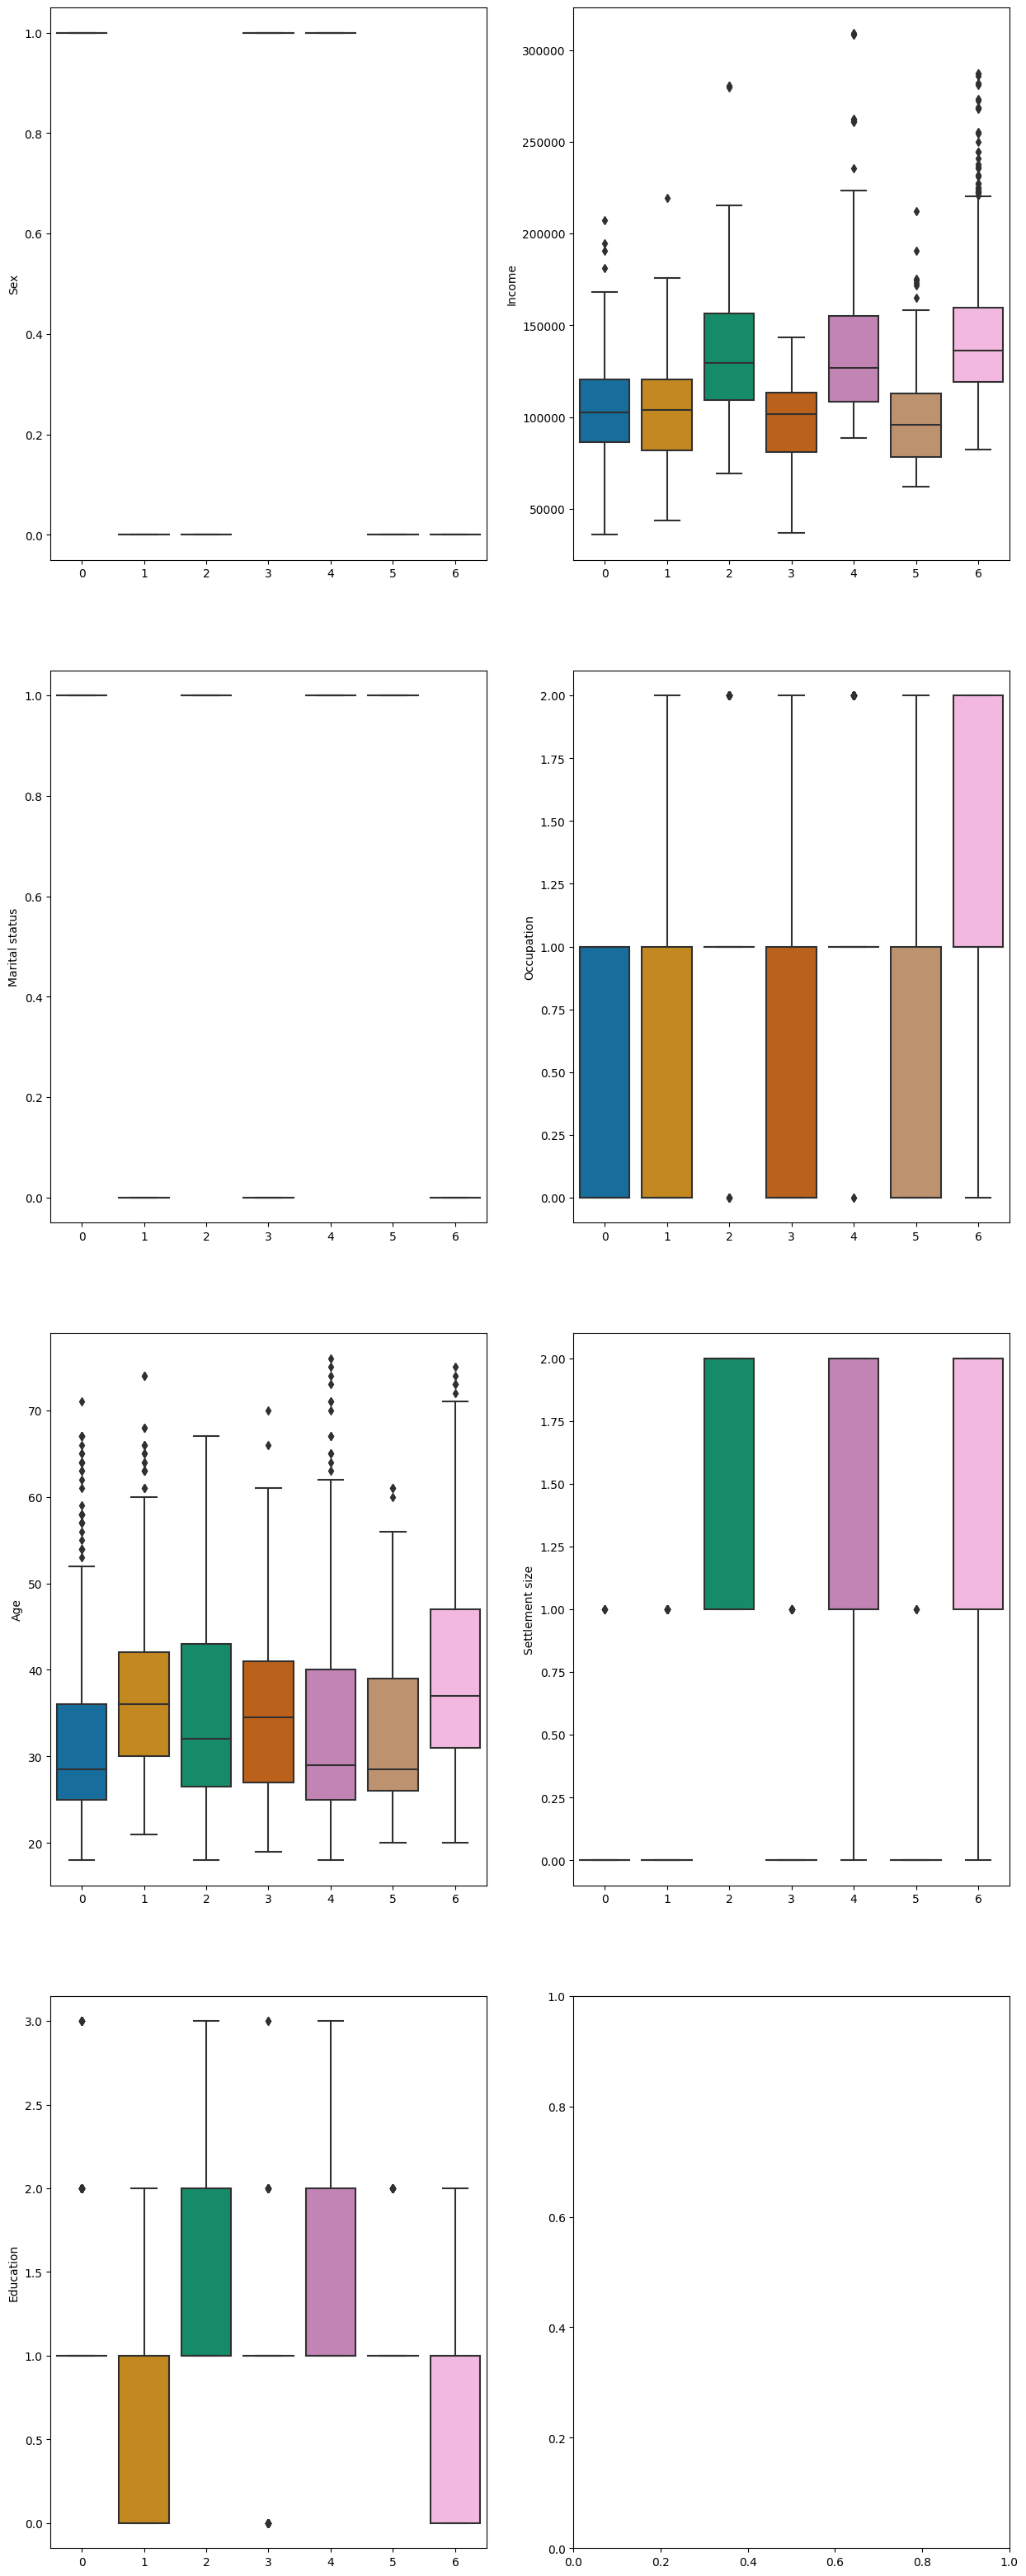

In [60]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (15, 40)) 

i_col = 0
i_row = 0

for col in df.columns:
    sns.boxplot(y = col, x = km.labels_,
               data = df,
               palette = 'colorblind', ax = axs[i_row, i_col])
    
    if i_row < 3:
        i_row += 1
    else:
        i_col += 1
        i_row = 0

# Кластеризация DBSCAN

In [57]:
# Подбор оптимальных гиперпараметров для DBSCAN

from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.6).fit(df_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Подходящее кол-во кластеров: {}'.format(n_clusters_))
print('Показатель шума в данных {:.2f}%'.format(100*n_noise_/df_scaled.shape[0]))


Подходящее кол-во кластеров: 4
Показатель шума в данных 0.10%


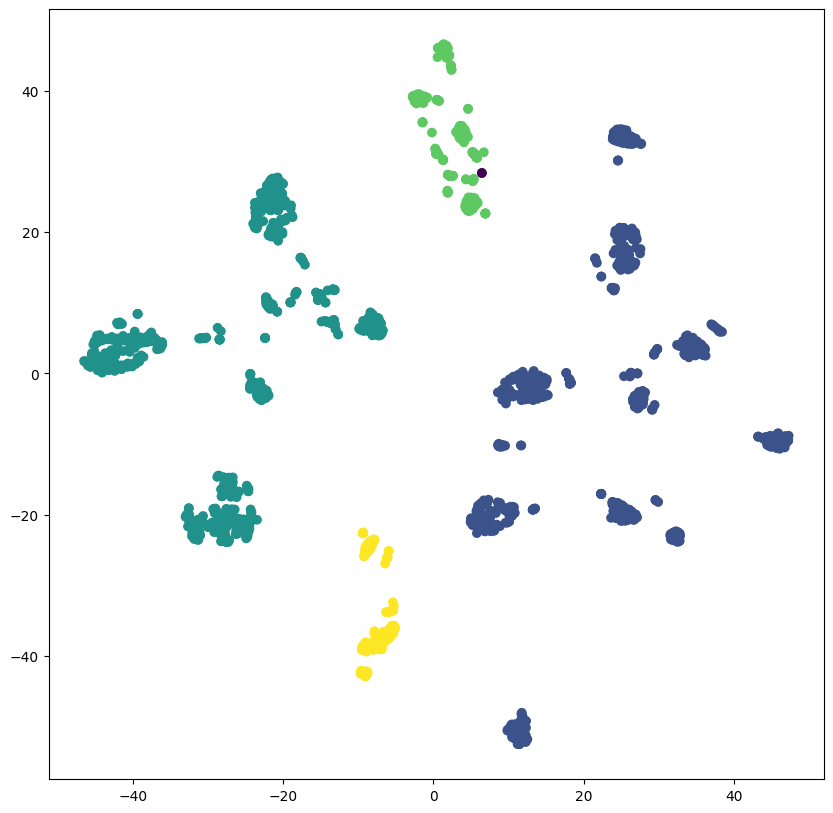

In [58]:
# Визуализация DBSCAN

plt.figure(figsize = (10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c = db.labels_)
plt.show()